<h1 style="text-align: center; color: lightblue;">A/B Testing</h1>

## **Target Group is 18-25**

## Insights specific to customers with age group of 18 - 25

1. People with age group of 18–25 account for ~25% of the customer base in the data.
2. Average annual income of this age group is less than $50k.
3. They don't have much credit history, which is reflected in their credit score and max credit limit.
4. Usage of credit cards as a payment type is relatively low compared to other groups.
5. Average transaction amount made with credit cards is also low compared to other groups.
6. Top 3 most used shopping product categories:  
   - Electronics  
   - Fashion & Apparel  
   - Beauty & Personal Care

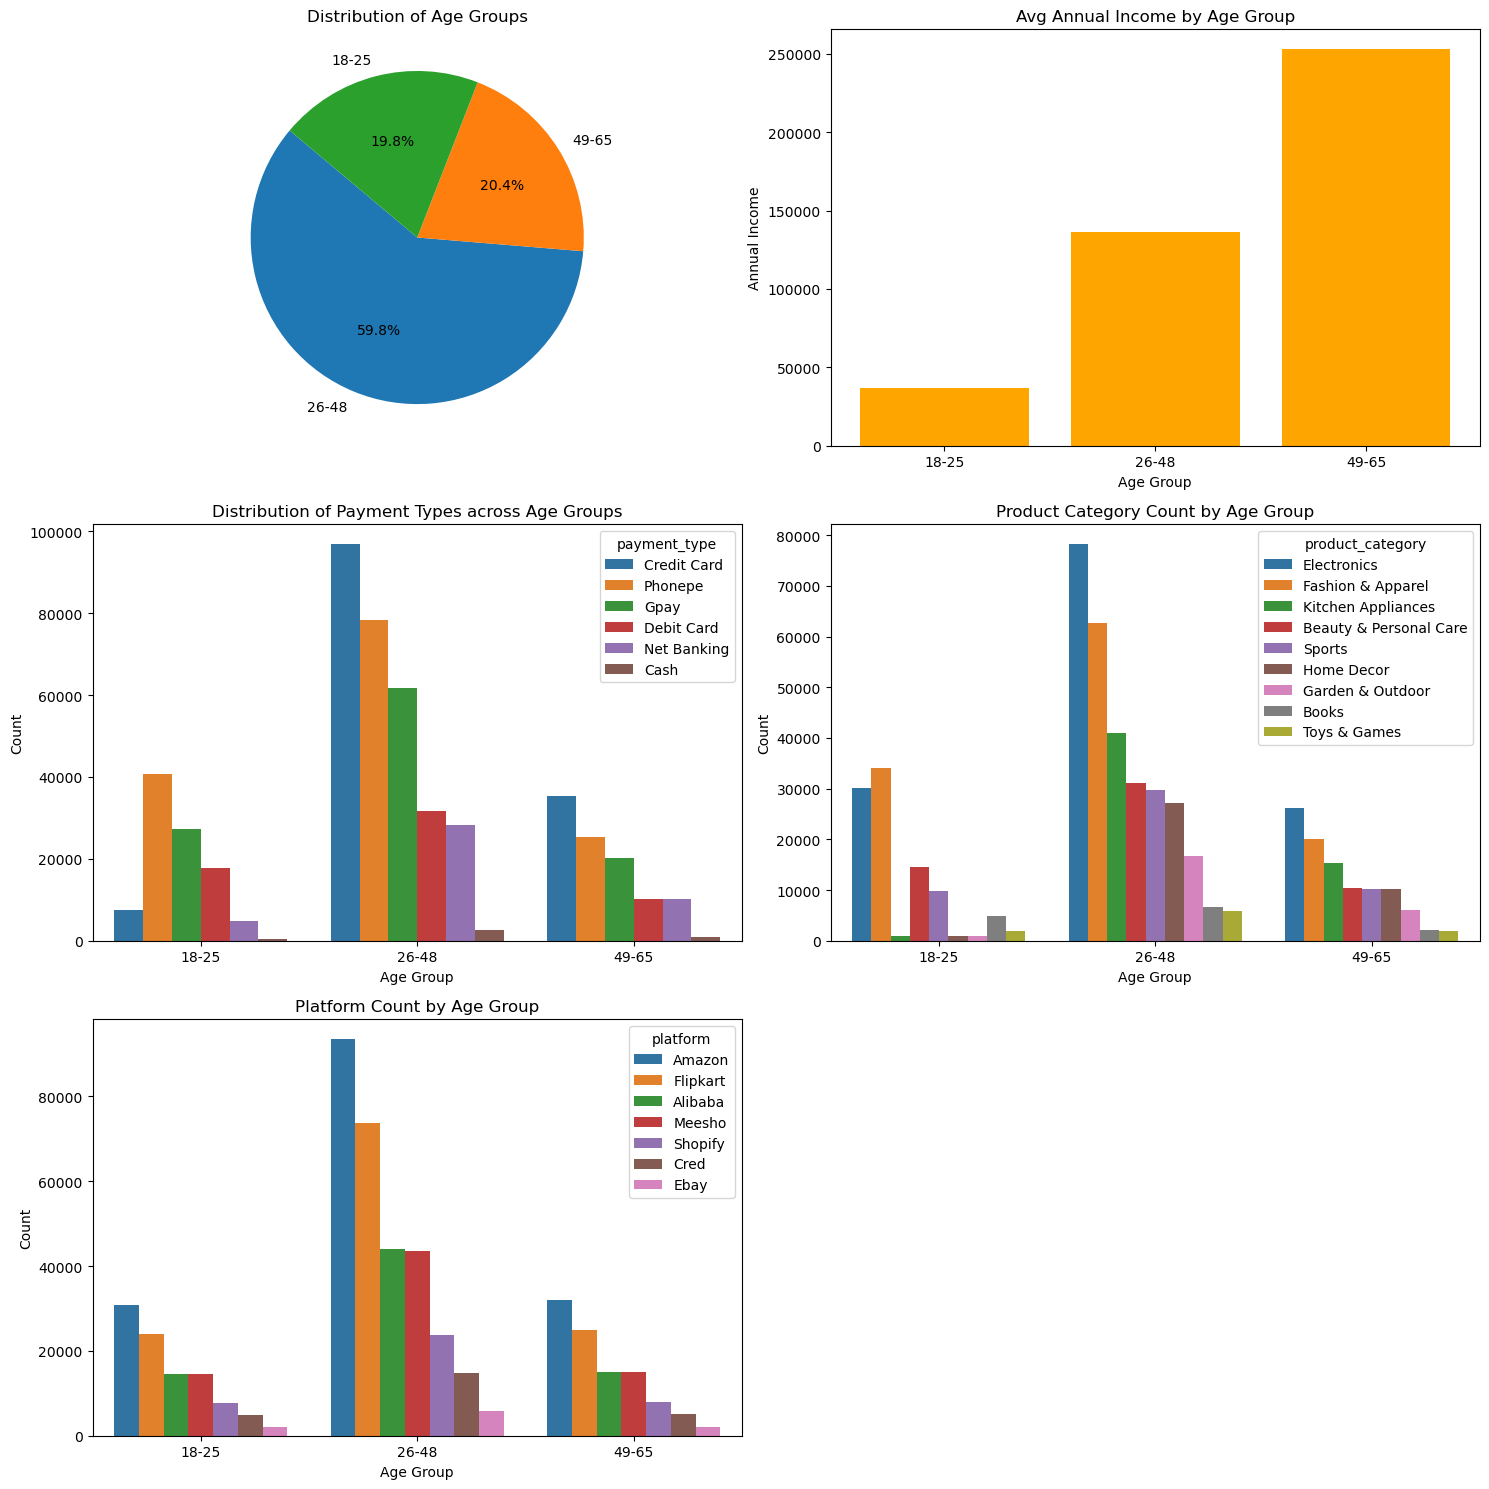

# Pre-campaign

In [17]:
import statsmodels.stats.api as sms
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from scipy.stats import norm

alpha = 0.05 : significance level (5%) : probability of type 1 error  
power = 0.8 : probability of correctly detecting as effect (1-type 2 error)  
effect_size = 0.2 : how big the difference between target group and test group

In [18]:
alpha = 0.05
power = 0.8
effect_size = 0.2  

sms.tt_ind_solve_power(
    effect_size=effect_size,
    alpha=alpha,
    power=power,
    alternative='two-sided'
)

393.40569300025163

## You need about 393 people per group (treatment & control)


In [19]:
effected_sizes = [0.1, 0.2, 0.3, 0.4, 0.5,1]

for size in effected_sizes:
    sample_size = sms.tt_ind_solve_power(
        effect_size=size,
        alpha=alpha,
        power=power,
        alternative='two-sided'
    )
    print(f"Effect size: {size}, Sample size per group: {sample_size:.2f}")

Effect size: 0.1, Sample size per group: 1570.73
Effect size: 0.2, Sample size per group: 393.41
Effect size: 0.3, Sample size per group: 175.38
Effect size: 0.4, Sample size per group: 99.08
Effect size: 0.5, Sample size per group: 63.77
Effect size: 1, Sample size per group: 16.71


## Sample Size Justification for Effect Size = 0.4

An effect size of **0.4** indicates a moderate difference between the control and test groups.

Based on statistical power analysis (α = 0.05, power = 0.8, two-sided test), the **required sample size per group** is approximately **99**.

You currently have **100 participants per group**, which is **sufficient** to detect this effect size with:
- ✅ 80% power
- ✅ 5% significance level

# Post-Campain

In [20]:
df_avg_transaction = pd.read_csv("datasets/avg_transactions_after_campaign.csv")
df_avg_transaction.head()

,campaign_date,control_group_avg_tran,test_group_avg_tran
0,2023-09-10,259.83,277.32
1,2023-09-11,191.27,248.68
2,2023-09-12,212.41,286.61
3,2023-09-13,214.92,214.85
4,2023-09-14,158.55,344.08


In [21]:
df_avg_transaction.shape

(62, 3)

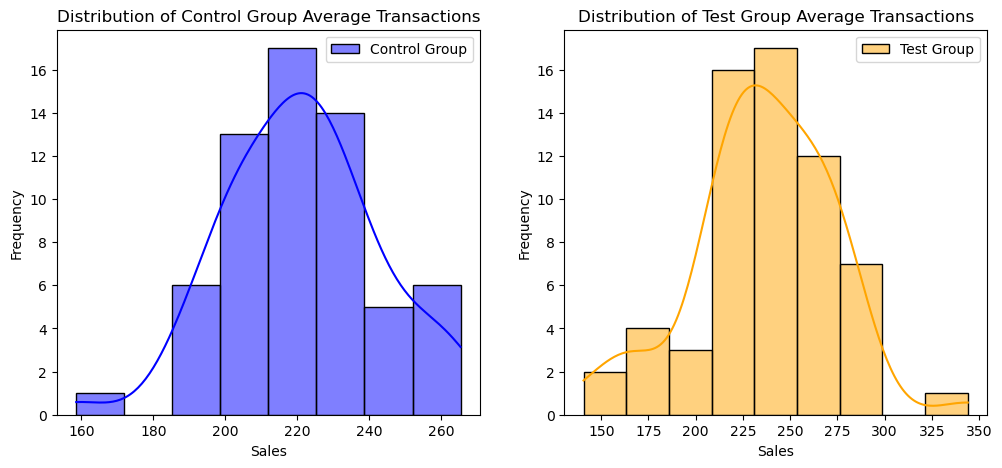

In [22]:
fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df_avg_transaction['control_group_avg_tran'], kde=True, ax=ax1 ,label='Control Group', color='blue')
ax1.set_title('Distribution of Control Group Average Transactions')
ax1.set_xlabel('Sales')
ax1.set_ylabel('Frequency')
ax1.legend()

sns.histplot(df_avg_transaction['test_group_avg_tran'], kde=True, ax=ax2 ,label='Test Group', color='orange')
ax2.set_title('Distribution of Test Group Average Transactions')
ax2.set_xlabel('Sales')
ax2.set_ylabel('Frequency')
ax2.legend()


plt.show()

In [23]:
df_avg_transaction[df_avg_transaction.control_group_avg_tran > df_avg_transaction.test_group_avg_tran]

,campaign_date,control_group_avg_tran,test_group_avg_tran
3,2023-09-13,214.92,214.85
8,2023-09-18,265.13,212.60
9,2023-09-19,232.88,207.63
16,2023-09-26,222.95,213.30
22,2023-10-02,238.39,203.10
23,2023-10-03,253.95,234.26
25,2023-10-05,239.47,216.37
26,2023-10-06,200.70,166.70
27,2023-10-07,200.91,170.01
28,2023-10-08,188.30,150.27


In [24]:
df_avg_transaction[df_avg_transaction.control_group_avg_tran > df_avg_transaction.test_group_avg_tran].shape[0] / df_avg_transaction.shape[0]

0.2903225806451613

## Test group is performing better in ~71% of the cases 

In [25]:
control_mean = df_avg_transaction['control_group_avg_tran'].mean().round(2)
control_std = df_avg_transaction['control_group_avg_tran'].std()
control_mean, control_std

(np.float64(221.18), 21.359192112027014)

In [26]:
test_mean = df_avg_transaction['test_group_avg_tran'].mean().round(2)
test_std = df_avg_transaction['test_group_avg_tran'].std()
test_mean, test_std

(np.float64(235.98), 36.65808210918637)

In [27]:
sample_size=df_avg_transaction.shape[0]
sample_size

62

In [28]:
a = (test_std ** 2) / sample_size
b = (control_std ** 2) / sample_size


z_score = (test_mean - control_mean) / np.sqrt(a+b)
z_score

np.float64(2.7467408082871687)

In [29]:
critical_value = st.norm.ppf(1 - alpha)
critical_value

np.float64(1.6448536269514722)

In [30]:
z_score > critical_value

np.True_

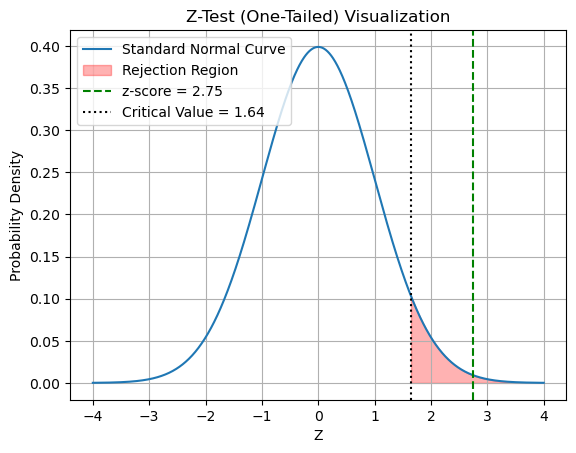

In [31]:
# Define x values around the standard normal curve
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)  # Standard Normal Distribution

# Plot the normal distribution curve
plt.plot(x, y, label='Standard Normal Curve')

# Fill the rejection region (right-tailed test)
plt.fill_between(x, y, where=(x >= critical_value), color='red', alpha=0.3, label='Rejection Region')

# Plot the z-score
plt.axvline(z_score, color='green', linestyle='--', label=f'z-score = {z_score:.2f}')

# Plot critical value line
plt.axvline(critical_value, color='black', linestyle=':', label=f'Critical Value = {critical_value:.2f}')

# Add labels and legend
plt.title('Z-Test (One-Tailed) Visualization')
plt.xlabel('Z')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

## According to this chart, the null hypothesis is rejected, and the alternative hypothesis is accepted. The test group performed significantly better.

In [32]:
p_value = round(1 - st.norm.cdf(z_score), 4)
print(f"p-value: {p_value*100}%")


p-value: 0.3%


### There is only a 0.3% chance that the test group performed the same as or worse than the control group, assuming the null hypothesis is true.
